In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from my_knn_module.import_data import import_genome_data_as_df

In [2]:
SAMPLE_SIZE = 1000
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier
SNP = 65534

In [3]:
sample = import_genome_data_as_df(filename='65Kreal.hapt', add_sub_populations = True).reset_index(drop=True)

sample.head()

,0,1,2,3,4,5,6,7,8,9,...,65529,65530,65531,65532,65533,65534,65535,65536,Superpopulation code,Population code
0,GBR,HG00096,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,GBR
1,GBR,HG00096,0,1,0,0,1,1,0,0,...,1,0,1,1,0,0,0,1,0,GBR
2,GBR,HG00097,0,1,0,0,1,1,0,0,...,1,0,1,1,0,0,0,0,0,GBR
3,GBR,HG00097,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,GBR
4,GBR,HG00099,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,GBR


In [4]:
sample.drop(sample[sample['Superpopulation code'] == 5].index, inplace = True)

In [5]:
# Load data and build model
#sample = import_genome_data_as_df().sample(SAMPLE_SIZE).reset_index(drop=True)
X = sample.iloc[:, 3:SNP + 3]
y = np.ravel(sample.iloc[:, SNP + 3:SNP + 4])
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [6]:
sample

,0,1,2,3,4,5,6,7,8,9,...,65529,65530,65531,65532,65533,65534,65535,65536,Superpopulation code,Population code
0,GBR,HG00096,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,GBR
1,GBR,HG00096,0,1,0,0,1,1,0,0,...,1,0,1,1,0,0,0,1,0,GBR
2,GBR,HG00097,0,1,0,0,1,1,0,0,...,1,0,1,1,0,0,0,0,0,GBR
3,GBR,HG00097,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,GBR
4,GBR,HG00099,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,GIH,NA21142,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,3,GIH
5004,GIH,NA21143,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,3,GIH
5005,GIH,NA21143,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,3,GIH
5006,GIH,NA21144,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,3,GIH


In [7]:
# Make predictions on data used to build the model
predictions = knn_model.predict(X)

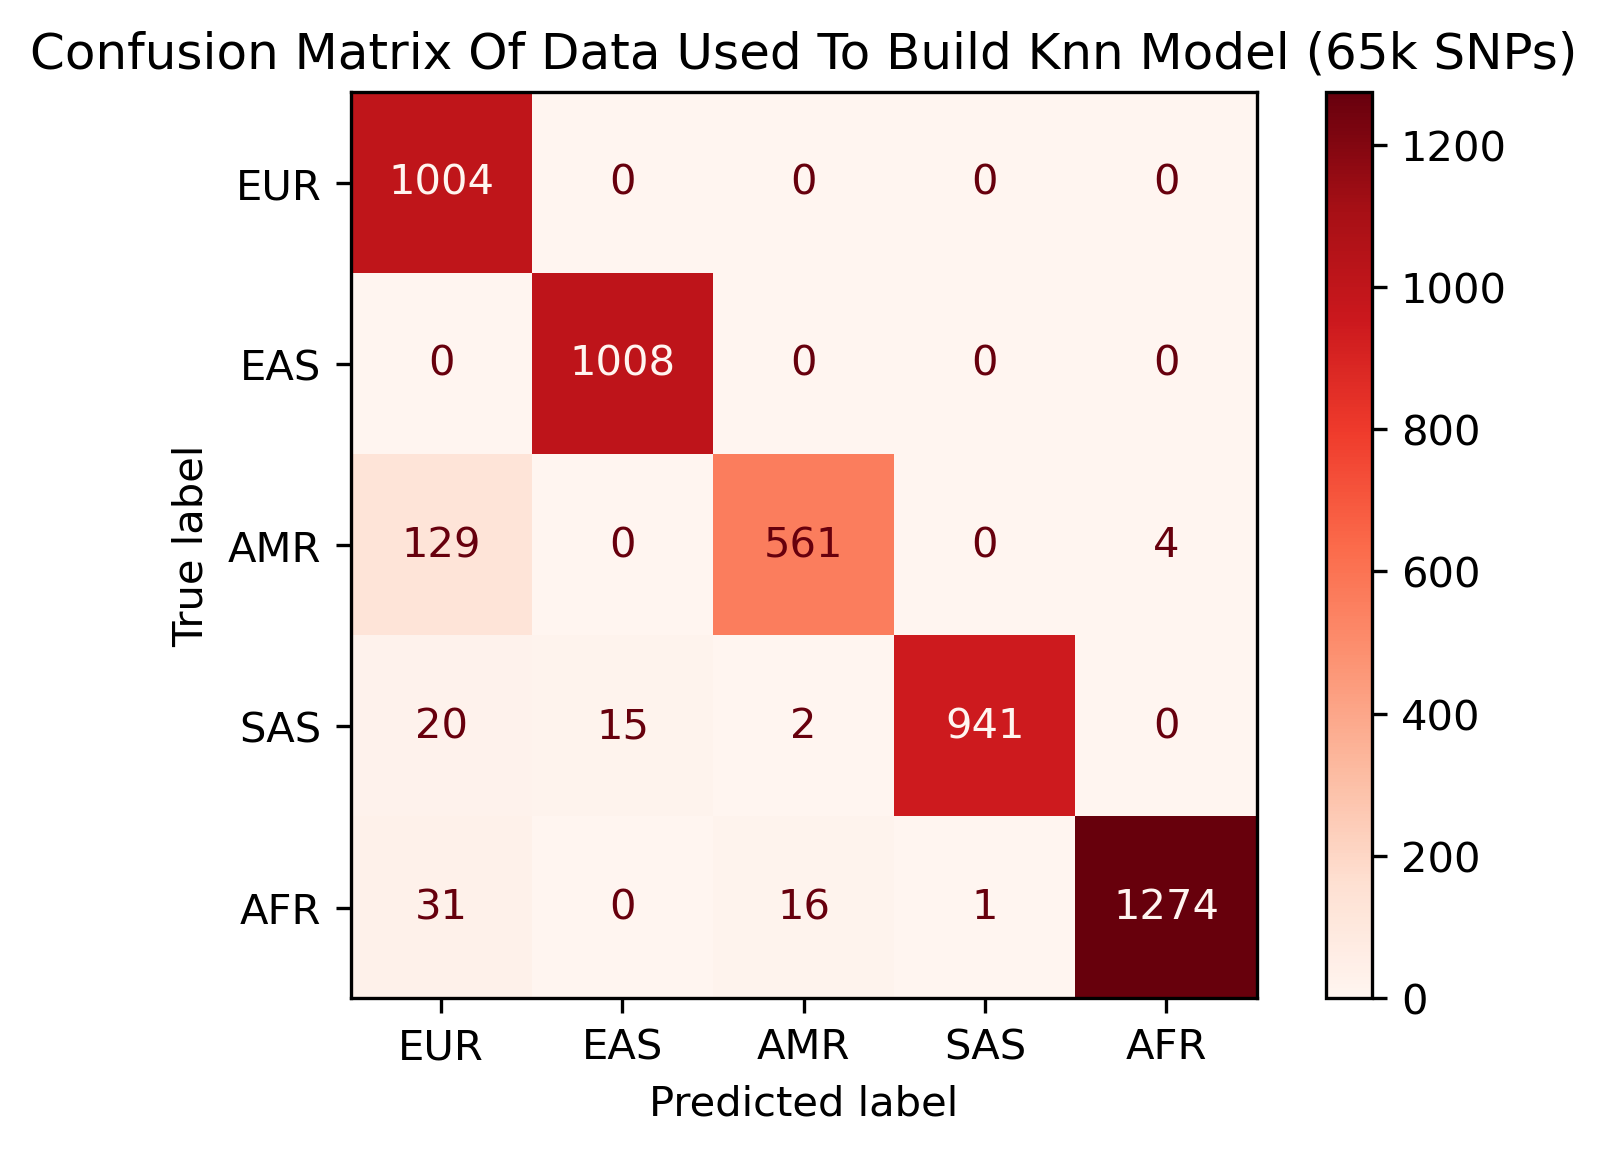

In [12]:

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Reds,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None,
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model (65k SNPs)")
fig = disp.ax_.get_figure() 
#fig.set_figwidth(20)
fig.set_dpi(300)

plt.show()




#plt.show()

#print(knn_model.score(X, y))

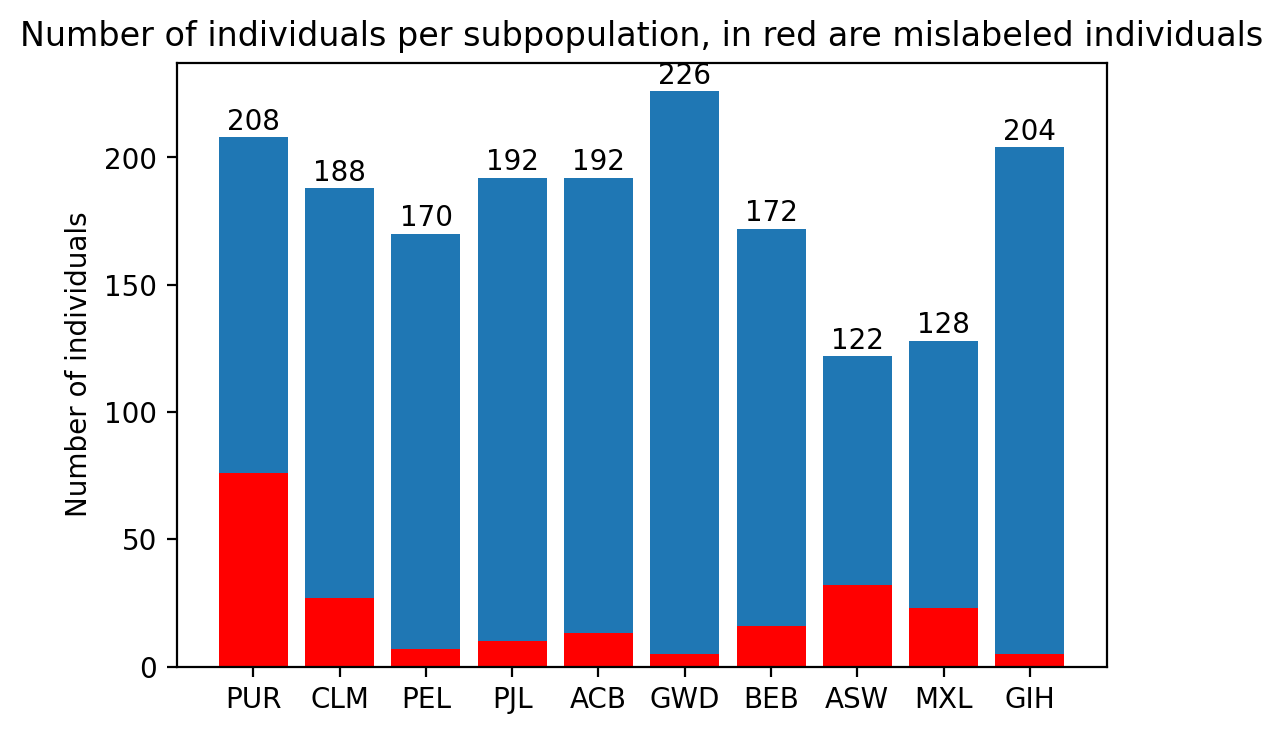

In [9]:
sub_population_dict = {}
for i in range(len(predictions)):
    if i < 1220 or i > 1221:
        if not sample['Population code'][i] in sub_population_dict: sub_population_dict[sample['Population code'][i]] = {'total': 0, 'errors': 0}
        sub_population_dict[sample['Population code'][i]]['total'] += 1
        if predictions[i] != y[i]: sub_population_dict[sample['Population code'][i]]['errors'] += 1 

#print(sub_population_dict)
sub_population_dict.pop('GBR')
sub_population_dict.pop('FIN')
sub_population_dict.pop('CHS')
sub_population_dict.pop('CDX')
sub_population_dict.pop('IBS')
sub_population_dict.pop('KHV')
sub_population_dict.pop('ESN')
sub_population_dict.pop('STU')
sub_population_dict.pop('CEU')
sub_population_dict.pop('YRI')
sub_population_dict.pop('CHB')
sub_population_dict.pop('JPT')
sub_population_dict.pop('TSI')
sub_population_dict.pop('MSL')
sub_population_dict.pop('ITU')
sub_population_dict.pop('LWK')

fig, ax = plt.subplots()
fig.set_dpi(200)

heights_total = []
errors_total = []
for key in sub_population_dict.keys():
    heights_total.append(sub_population_dict[key]['total'])
    errors_total.append(sub_population_dict[key]['errors'])
bars = ax.bar(sub_population_dict.keys(), height=heights_total)
ax.bar(sub_population_dict.keys(), height=errors_total, color='r')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 3, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per subpopulation, in red are mislabeled individuals')
plt.show()



In [10]:
test_sample = import_genome_data_as_df().sample(SAMPLE_SIZE).reset_index(drop=True)
test_sample_input = test_sample.iloc[:, 3:10002]
test_sample_real = np.ravel(test_sample.iloc[:, 10002:10003])
test_predictions = knn_model.predict(test_sample_input)

ValueError: X has 9999 features, but KNeighborsClassifier is expecting 65534 features as input.

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Randomly Sampled Data")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Randomly Sampled Data Normalized")

plt.show()

In [ ]:
_scores = []
_neighbors = [i+1 for i in range(256)]

for i in _neighbors:
    NUMBER_OF_NEIGHBORS = i
    X = sample.iloc[:, 3:SNP + 3]
    y = np.ravel(sample.iloc[:, SNP + 3:SNP + 4])
    knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
    knn_model.fit(X, y)
    _scores.append(knn_model.score(X, y))
    print(str(i) + '/256')
print(_scores)

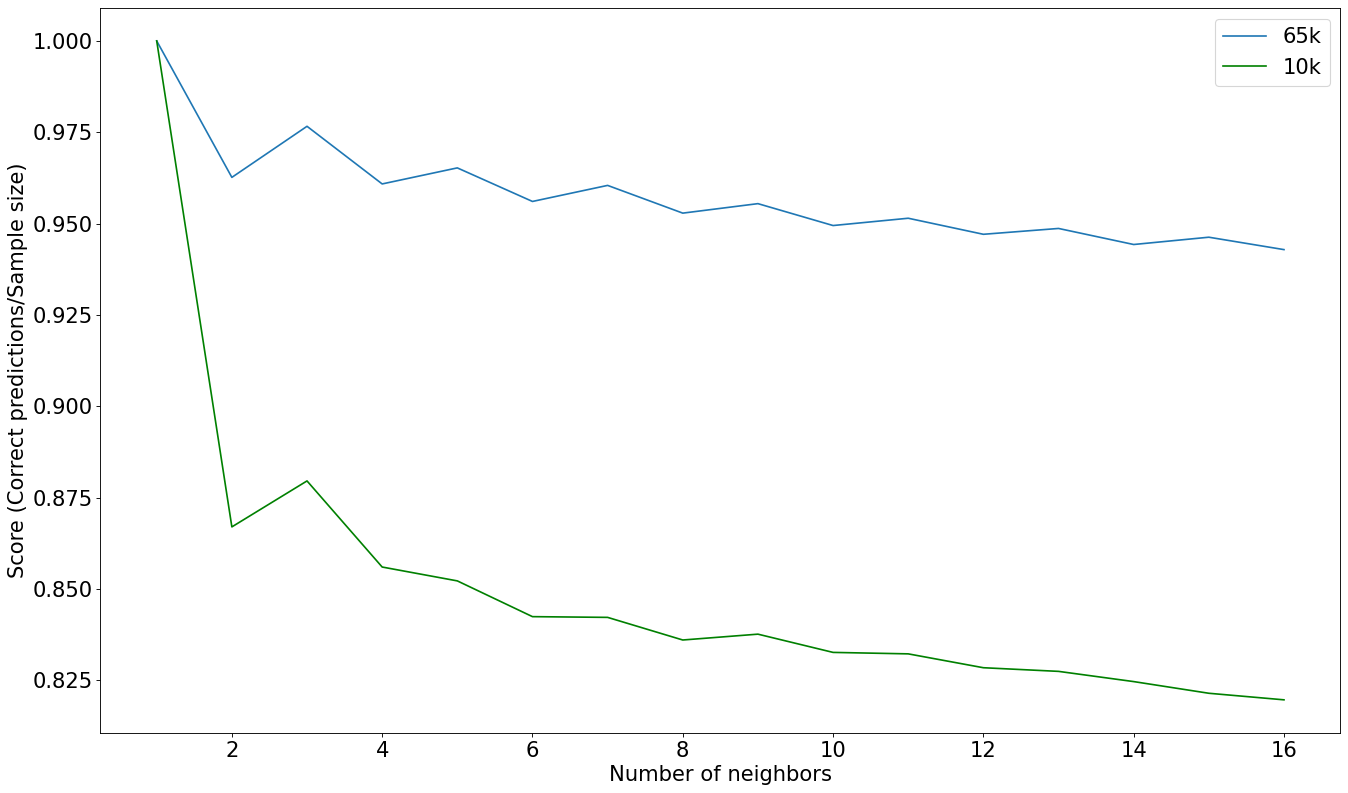

In [17]:
scores65k = [1.0, 0.9626597444089456, 0.9766373801916933, 0.9608626198083067, 0.9652555910543131, 0.9560702875399361, 0.9604632587859425, 0.9528753993610224, 0.9554712460063898, 0.9494808306709265, 0.9514776357827476, 0.9470846645367412, 0.9486821086261981, 0.9442891373801917, 0.9462859424920128, 0.9428913738019169, 0.9440894568690096, 0.9426916932907349, 0.943091054313099, 0.9412939297124601, 0.9412939297124601, 0.9388977635782748, 0.9398961661341853, 0.9375, 0.9384984025559105, 0.9371006389776357, 0.9371006389776357, 0.9353035143769968, 0.9353035143769968, 0.9343051118210862, 0.9347044728434505, 0.9331070287539937, 0.9341054313099042, 0.9335063897763578, 0.9335063897763578, 0.9333067092651757, 0.9331070287539937, 0.9323083067092651, 0.9329073482428115, 0.9323083067092651, 0.9331070287539937, 0.9329073482428115, 0.9337060702875399, 0.9331070287539937, 0.9331070287539937, 0.9325079872204473, 0.9325079872204473, 0.9315095846645367, 0.9323083067092651, 0.931908945686901, 0.9317092651757188, 0.9315095846645367, 0.931908945686901, 0.9315095846645367, 0.9313099041533547, 0.9307108626198083, 0.9307108626198083, 0.9303115015974441, 0.9307108626198083, 0.9303115015974441, 0.930111821086262, 0.9299121405750799, 0.9299121405750799, 0.9297124600638977, 0.9291134185303515, 0.9285143769968051, 0.9285143769968051, 0.928314696485623, 0.9285143769968051, 0.928314696485623, 0.928314696485623, 0.928314696485623, 0.9287140575079872, 0.9285143769968051, 0.9285143769968051, 0.928314696485623, 0.928314696485623, 0.928314696485623, 0.9279153354632588, 0.9277156549520766, 0.9281150159744409, 0.9281150159744409, 0.9279153354632588, 0.9277156549520766, 0.928314696485623, 0.9279153354632588, 0.9279153354632588, 0.9273162939297125, 0.9277156549520766, 0.9275159744408946, 0.9271166134185304, 0.9267172523961661, 0.9277156549520766, 0.9267172523961661, 0.9269169329073482, 0.9273162939297125, 0.9271166134185304, 0.9271166134185304, 0.9269169329073482, 0.9267172523961661, 0.9267172523961661, 0.9269169329073482, 0.9271166134185304, 0.9273162939297125, 0.9271166134185304, 0.9267172523961661, 0.9269169329073482, 0.9267172523961661, 0.9269169329073482, 0.9263178913738019, 0.9261182108626198, 0.9263178913738019, 0.9261182108626198, 0.9261182108626198, 0.9263178913738019, 0.9259185303514377, 0.9259185303514377, 0.9257188498402555, 0.9257188498402555, 0.9257188498402555, 0.9257188498402555, 0.9255191693290735, 0.9259185303514377, 0.9255191693290735, 0.9257188498402555, 0.9255191693290735, 0.9259185303514377, 0.9251198083067093, 0.9255191693290735, 0.9249201277955271, 0.9253194888178914, 0.9249201277955271, 0.9251198083067093, 0.9249201277955271, 0.9249201277955271, 0.9253194888178914, 0.9253194888178914, 0.9253194888178914, 0.9253194888178914, 0.9251198083067093, 0.9253194888178914, 0.9251198083067093, 0.9251198083067093, 0.9249201277955271, 0.9249201277955271, 0.924720447284345, 0.9249201277955271, 0.9251198083067093, 0.9253194888178914, 0.9249201277955271, 0.9249201277955271, 0.9249201277955271, 0.924720447284345, 0.9249201277955271, 0.924520766773163, 0.9243210862619808, 0.9243210862619808, 0.9243210862619808, 0.9243210862619808, 0.9243210862619808, 0.9241214057507987, 0.9241214057507987, 0.9239217252396166, 0.9237220447284346, 0.9241214057507987, 0.9239217252396166, 0.9235223642172524, 0.9235223642172524, 0.9235223642172524, 0.9235223642172524, 0.9233226837060703, 0.9237220447284346, 0.9233226837060703, 0.9233226837060703, 0.922923322683706, 0.922923322683706, 0.9231230031948882, 0.922923322683706, 0.9231230031948882, 0.922723642172524, 0.9225239616613419, 0.922723642172524, 0.922723642172524, 0.922923322683706, 0.922723642172524, 0.922923322683706, 0.9231230031948882, 0.922923322683706, 0.9231230031948882, 0.9233226837060703, 0.922923322683706, 0.922923322683706, 0.9223242811501597, 0.9221246006389776, 0.9223242811501597, 0.9225239616613419, 0.9223242811501597, 0.9223242811501597, 0.9225239616613419, 0.9223242811501597, 0.9223242811501597, 0.9221246006389776, 0.9223242811501597, 0.9217252396166135, 0.9217252396166135, 0.9217252396166135, 0.9219249201277955, 0.9217252396166135, 0.9217252396166135, 0.9219249201277955, 0.9219249201277955, 0.9217252396166135, 0.9217252396166135, 0.9215255591054313, 0.9219249201277955, 0.9217252396166135, 0.9217252396166135, 0.9211261980830671, 0.9213258785942492, 0.9213258785942492, 0.9207268370607029, 0.9213258785942492, 0.920926517571885, 0.9213258785942492, 0.9211261980830671, 0.9211261980830671, 0.9211261980830671, 0.9205271565495208, 0.920926517571885, 0.9207268370607029, 0.9211261980830671, 0.920926517571885, 0.9213258785942492, 0.920926517571885, 0.9211261980830671, 0.920926517571885, 0.920926517571885, 0.920926517571885, 0.9207268370607029, 0.9203274760383386, 0.9207268370607029, 0.9205271565495208, 0.9211261980830671, 0.920926517571885, 0.9211261980830671, 0.9211261980830671, 0.9211261980830671, 0.9207268370607029, 0.9211261980830671, 0.9207268370607029, 0.9207268370607029, 0.9207268370607029, 0.9201277955271565, 0.9207268370607029, 0.9203274760383386, 0.9207268370607029]
scores10k = [1.0, 0.8670127795527156, 0.8795926517571885, 0.8560303514376997, 0.8522364217252396, 0.8424520766773163, 0.8422523961661342, 0.8360623003194888, 0.8376597444089456, 0.832667731629393, 0.8322683706070287, 0.8284744408945687, 0.8274760383386581, 0.8246805111821086, 0.8214856230031949, 0.8196884984025559, 0.8204872204472844, 0.818091054313099, 0.8164936102236422, 0.8136980830670927, 0.8148961661341853, 0.8121006389776357, 0.8117012779552716, 0.8117012779552716, 0.8126996805111821, 0.8111022364217252, 0.8095047923322684, 0.8101038338658147, 0.8089057507987221, 0.8101038338658147, 0.8087060702875399, 0.8083067092651757, 0.8067092651757188, 0.8063099041533547, 0.8059105431309904, 0.805111821086262, 0.8035143769968051, 0.803314696485623, 0.803314696485623, 0.8041134185303515, 0.8019169329073482, 0.8025159744408946, 0.8017172523961661, 0.8003194888178914, 0.8013178913738019, 0.7985223642172524, 0.7989217252396166, 0.7985223642172524, 0.7975239616613419, 0.7975239616613419, 0.7973242811501597, 0.7971246006389776, 0.7963258785942492, 0.7957268370607029, 0.7945287539936102, 0.7951277955271565, 0.7951277955271565, 0.7957268370607029, 0.795926517571885, 0.7945287539936102, 0.7947284345047924, 0.7949281150159745, 0.794129392971246, 0.7933306709265175, 0.7931309904153354, 0.7929313099041534, 0.792132587859425, 0.792332268370607, 0.7927316293929713, 0.792132587859425, 0.7917332268370607, 0.792332268370607, 0.7913338658146964, 0.7919329073482428, 0.7907348242811502, 0.7899361022364217, 0.7891373801916933, 0.7895367412140575, 0.7883386581469649, 0.7887380191693291, 0.7887380191693291, 0.7877396166134185, 0.7869408945686901, 0.7877396166134185, 0.7869408945686901, 0.7865415335463258, 0.7859424920127795, 0.7857428115015974, 0.7839456869009584, 0.7841453674121406, 0.7843450479233227, 0.7841453674121406, 0.7841453674121406, 0.7843450479233227, 0.7837460063897763, 0.7835463258785943, 0.7841453674121406, 0.7839456869009584, 0.7839456869009584, 0.7833466453674122, 0.7823482428115016, 0.7833466453674122, 0.7819488817891374, 0.7825479233226837, 0.7837460063897763, 0.78314696485623, 0.7829472843450479, 0.7827476038338658, 0.78314696485623, 0.78314696485623, 0.7817492012779552, 0.78314696485623, 0.7825479233226837, 0.7827476038338658, 0.7817492012779552, 0.7819488817891374, 0.7829472843450479, 0.7821485623003195, 0.7807507987220448, 0.7823482428115016, 0.7815495207667732, 0.7817492012779552, 0.7813498402555911, 0.7807507987220448, 0.7809504792332268, 0.7803514376996805, 0.7805511182108626, 0.7797523961661342, 0.7805511182108626, 0.7801517571884984, 0.7795527156549521, 0.7789536741214057, 0.7801517571884984, 0.7797523961661342, 0.7805511182108626, 0.7807507987220448, 0.7795527156549521, 0.7795527156549521, 0.7783546325878594, 0.7791533546325878, 0.7785543130990416, 0.7779552715654952, 0.7767571884984026, 0.7769568690095847, 0.7765575079872205, 0.775758785942492, 0.7767571884984026, 0.7755591054313099, 0.7753594249201278, 0.7753594249201278, 0.7743610223642172, 0.7741613418530351, 0.7747603833865815, 0.7749600638977636, 0.7747603833865815, 0.7749600638977636, 0.7733626198083067, 0.7743610223642172, 0.7729632587859425, 0.7727635782747604, 0.7733626198083067, 0.7735623003194888, 0.7733626198083067, 0.7729632587859425, 0.7737619808306709, 0.7739616613418531, 0.7741613418530351, 0.7741613418530351, 0.7735623003194888, 0.7739616613418531, 0.7735623003194888, 0.7729632587859425, 0.7717651757188498, 0.7725638977635783, 0.7721645367412141, 0.7735623003194888, 0.7735623003194888, 0.7737619808306709, 0.7727635782747604, 0.7725638977635783, 0.7709664536741214, 0.7725638977635783, 0.7725638977635783, 0.7723642172523961, 0.7729632587859425, 0.771964856230032, 0.7721645367412141, 0.7717651757188498, 0.771964856230032, 0.7715654952076677, 0.7723642172523961, 0.7725638977635783, 0.7709664536741214, 0.7721645367412141, 0.7715654952076677, 0.7715654952076677, 0.7707667731629393, 0.7707667731629393, 0.7705670926517572, 0.7695686900958466, 0.7689696485623003, 0.7691693290734825, 0.7693690095846646, 0.7699680511182109, 0.7685702875399361, 0.768370607028754, 0.7677715654952076, 0.7689696485623003, 0.7689696485623003, 0.7679712460063898, 0.7675718849840255, 0.7677715654952076, 0.7685702875399361, 0.768370607028754, 0.7675718849840255, 0.7673722044728435, 0.7673722044728435, 0.7679712460063898, 0.7663738019169329, 0.7677715654952076, 0.7675718849840255, 0.7673722044728435, 0.7667731629392971, 0.7667731629392971, 0.766573482428115, 0.7659744408945687, 0.7663738019169329, 0.764576677316294, 0.7651757188498403, 0.7657747603833865, 0.7653753993610224, 0.7639776357827476, 0.762979233226837, 0.762979233226837, 0.7635782747603834, 0.7639776357827476, 0.7631789137380192, 0.762979233226837, 0.762979233226837, 0.7625798722044729, 0.762779552715655, 0.7611821086261981, 0.7611821086261981, 0.7611821086261981, 0.7615814696485623, 0.7613817891373802, 0.7607827476038339, 0.7601837060702875, 0.7607827476038339, 0.7611821086261981, 0.7603833865814696, 0.7599840255591054, 0.7603833865814696, 0.7597843450479234, 0.7599840255591054, 0.7595846645367412]
_x = [i+1 for i in range(16)]
plt.figure(figsize=(20, 12), dpi=80)
plt.plot(_x, scores65k[0: 16], '-', label="65k")
plt.plot(_x, scores10k[0: 16], 'g-', label="10k")
plt.xlabel("Number of neighbors")
plt.ylabel("Score (Correct predictions/Sample size)")
plt.rc('font', size=19)
plt.rc('axes', titlesize=19)     # fontsize of the axes title
plt.rc('axes', labelsize=19)    # fontsize of the x and y labels
plt.legend()
plt.show()